In [43]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [44]:
from fastai.imports import *
from fastai.conv_learner import *
from fastai.learner import *
from fastai.model import *
from fastai.sgdr import *
from fastai.plots import *
from fastai.transforms import *
from fastai.dataset import *
from fastai.metrics import *

In [45]:
PATH = 'data/Planet'

In [46]:
ls{PATH}

__MACOSX/                     test-jpg.tar                  train-jpg/
models/                       test-jpg.tar.7z               train-jpg.tar
sample_submission_v2.csv      test_v2_file_mapping.csv      train-jpg.tar.7z
sample_submission_v2.csv.zip  test_v2_file_mapping.csv.zip  train_v2.csv
test-jpg/                     tmp/                          train_v2.csv.zip


In [47]:
labels_csv=f'{PATH}/train_v2.csv'
n=len(list(open(labels_csv)))-1
valid_indx = get_cv_idxs(n)

In [48]:
n

40479

In [49]:
valid_indx

array([21694, 11665, 24256, ..., 37194, 16850,  6265])

In [50]:
len(valid_indx)

8095

In [51]:
files = !ls {PATH}/train-jpg

In [53]:
img = plt.imread(f'{PATH}/train-jpg/{files[0]}')

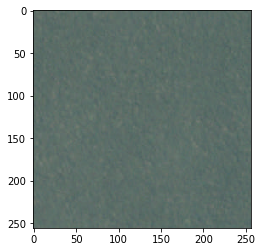

In [54]:
plt.imshow(img)

In [55]:
labels_csv

'data/Planet/train_v2.csv'

In [56]:
label = labels_csv[1]

In [57]:
label

'a'

In [58]:
arch = resnet34
bs=64
sz=256
from planet import f2

In [63]:
tfms = tfms_from_model(arch,sz,aug_tfms=transforms_top_down,max_zoom=1.1)
data = ImageClassifierData.from_csv(PATH,'train-jpg',labels_csv,bs,tfms=tfms,suffix = '.jpg',val_idxs=valid_indx,test_name='test-jpg')
learn= ConvLearner.pretrained(arch,data,metrics = [f2])

In [60]:
??ImageClassifierData.from_csv

In [66]:
x,y = next(iter(data.val_dl))
y


    1     0     0  ...      0     1     1
    0     0     0  ...      0     0     0
    0     0     0  ...      0     0     0
       ...          ⋱          ...       
    0     0     0  ...      0     0     0
    0     0     0  ...      0     0     0
    1     0     0  ...      0     0     0
[torch.FloatTensor of size 64x17]

In [65]:
data.classes

['agriculture',
 'artisinal_mine',
 'bare_ground',
 'blooming',
 'blow_down',
 'clear',
 'cloudy',
 'conventional_mine',
 'cultivation',
 'habitation',
 'haze',
 'partly_cloudy',
 'primary',
 'road',
 'selective_logging',
 'slash_burn',
 'water']

In [67]:
list(zip(data.classes,y[0]))

[('agriculture', 1.0),
 ('artisinal_mine', 0.0),
 ('bare_ground', 0.0),
 ('blooming', 0.0),
 ('blow_down', 0.0),
 ('clear', 1.0),
 ('cloudy', 0.0),
 ('conventional_mine', 0.0),
 ('cultivation', 0.0),
 ('habitation', 0.0),
 ('haze', 0.0),
 ('partly_cloudy', 0.0),
 ('primary', 1.0),
 ('road', 0.0),
 ('selective_logging', 0.0),
 ('slash_burn', 1.0),
 ('water', 1.0)]

In [68]:
lrf = learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))


                                       
                                       
                                       

                                       
                                       
                                       
                                       

  0%|          | 0/506 [00:00<?, ?it/s]
                                       
                                       
                                       
                                       
                                       
                                       
                                       
                                       
                                       

Exception in thread Thread-6:
Traceback (most recent call last):
  File "/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration




 25%|██▌       | 127/506 [01:19<03:58,  1.59it/s, loss=0.824]


 50%|█████     | 253/506 [02:29<02:29,  1.69it/s, loss=0.74] 


 75%|███████▍  | 379/506 [03:38<01:13,  1.73it/s, loss=0.27] 


100%|█████████▉| 505/506 [04:48<00:00,  1.75it/s, loss=0.199]


100%|██████████| 506/506 [04:48<00:00,  1.75it/s, loss=0.199]
                                                             [0.      0.19926 0.2768  0.86332]



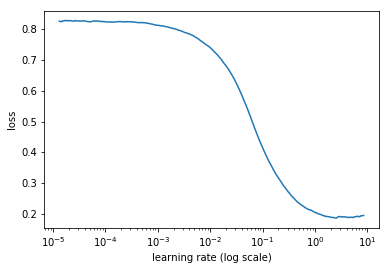

In [69]:
learn.sched.plot()

In [70]:
lr=0.2

In [71]:
learn.freeze(
)

In [74]:
learn.fit(lr,3,cycle_len =1,cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[0.      0.13282 0.11363 0.90603]                            
[1.      0.12643 0.10861 0.90914]                            
[2.      0.12166 0.1062  0.91162]                            
[3.      0.12466 0.10599 0.91024]                            
[4.      0.12304 0.1038  0.91338]                            
[5.      0.11854 0.10174 0.91652]                            
[6.      0.11679 0.1018  0.9159 ]                            



In [75]:
lrs = np.array([lr/9,lr/3,lr])
learn.unfreeze()

In [76]:
learn.fit(lr,3,cycle_len=1,cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[0.      0.10987 0.09474 0.92354]                            
[1.      0.10843 0.09226 0.92491]                            
[2.      0.10016 0.08615 0.92921]                             
[3.      0.10409 0.09034 0.92776]                             
[4.      0.1015  0.08511 0.93012]                             
[5.      0.09366 0.08249 0.93292]                             
[6.      0.09122 0.08147 0.933  ]                             



In [78]:
learn.save(f'{sz}')

In [79]:
tta = learn.TTA()

In [80]:
f2(*tta)

0.9318343354450621